<a href="https://colab.research.google.com/github/aalr007/VisionComputacional/blob/main/5.3_frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Visión computacional para imágenes y video*** </center>
## <center> ***Frequency Domain*** </center>
### Profesor: Gilberto Ochoa Ruiz
### Alumnos:
* Alberto Nieves Cisneros            A01793829
* Aurelio Antonio Lozano Rábago      A01081266
* Héctor Manuel González Villareal   A00178679
* Jessica Lechuga Ramos              A01793512
* Luis Alfredo Negron Naldos         A01793865

#### <p style='text-align: right;'> 12 de Febrero del 2023 </p>

## Table of Contents
1. [Libraries](#libraries)
2. [Fast Fourier Transform (FFT)](#fft)
3. [Low Pass Filter](#low)
4. [High Pass Filter](#high)
8. [Exercises](#exercises)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

## Fast Fourier Transform (FFT) <a class="anchor" id="fft" ></a>

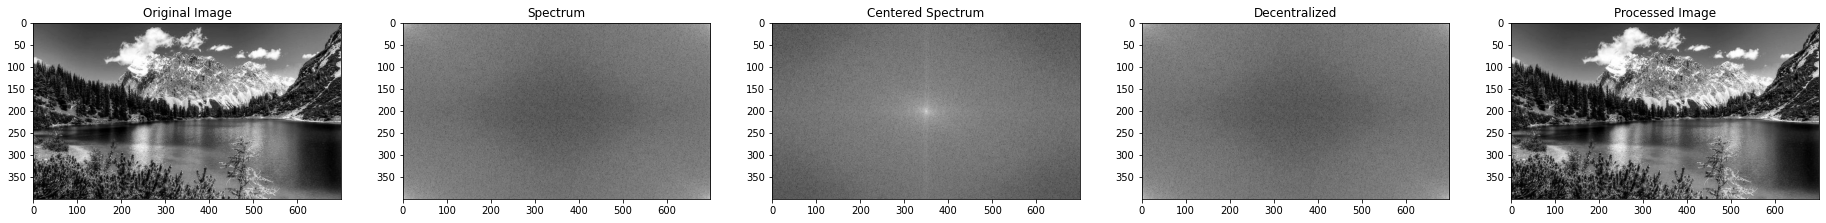

In [6]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("sample_data/image.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

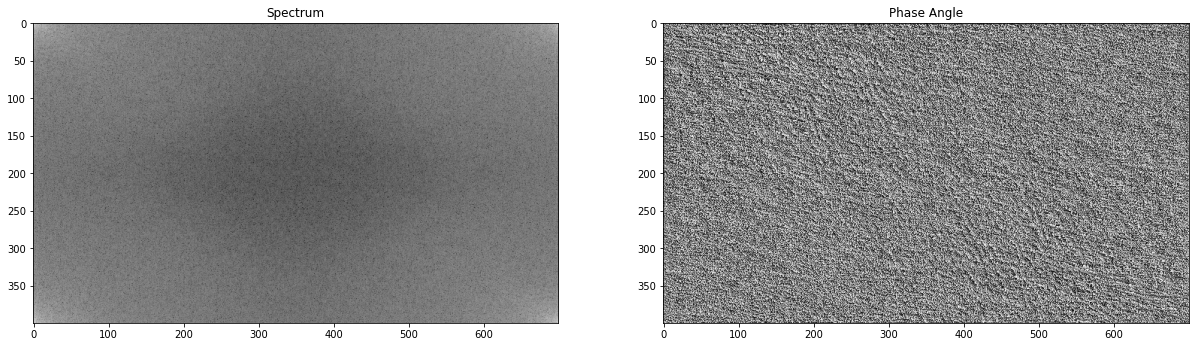

In [7]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("sample_data/image.jpg", 0)

original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")

plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

In [8]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

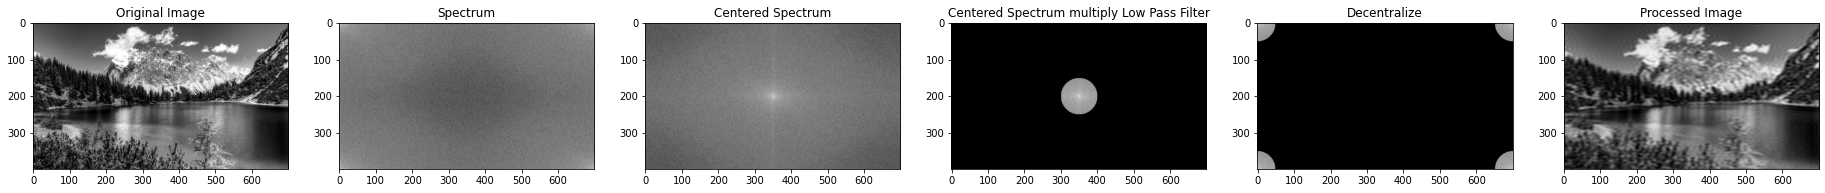

In [9]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("sample_data/image.jpg", 0)
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## Low Pass Filter <a class="anchor" id="low" ></a>

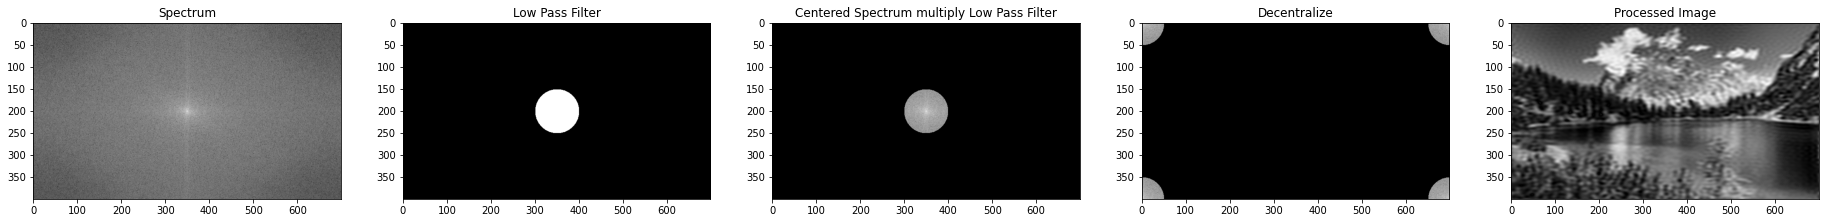

In [7]:
img = cv2.imread("sample_data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## High Pass Filter <a class="anchor" id="high" ></a>

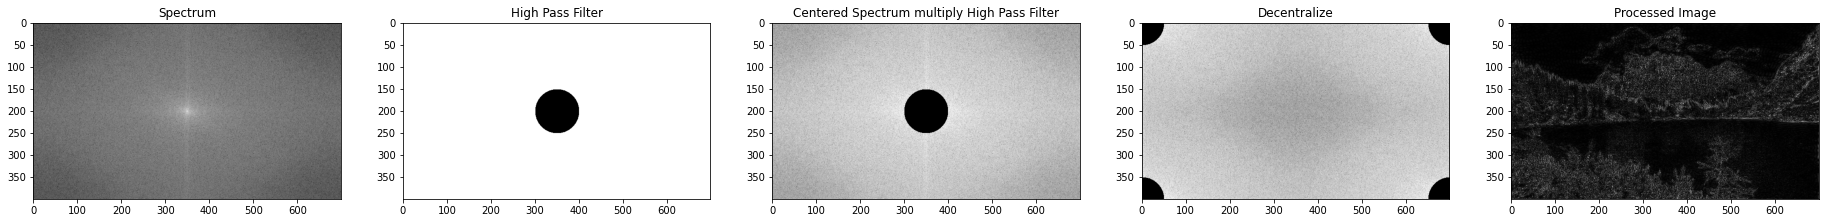

In [8]:
img = cv2.imread("sample_data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

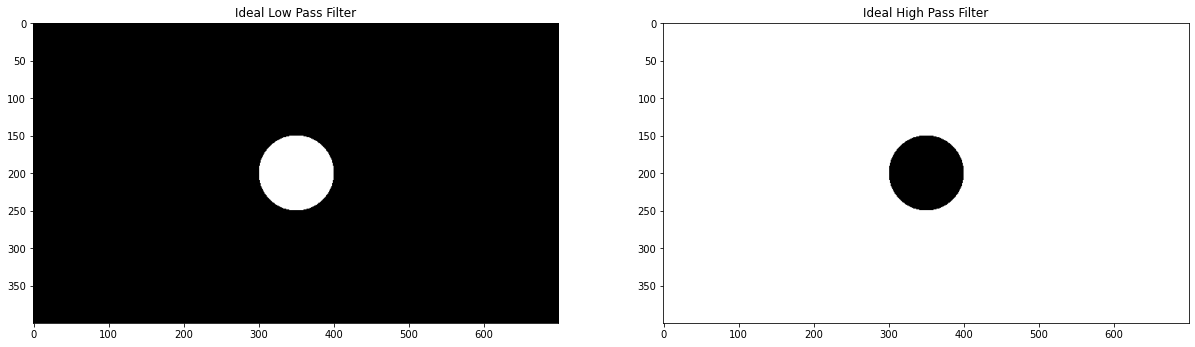

In [9]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Ideal Low Pass Filter")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Ideal High Pass Filter")

plt.show()

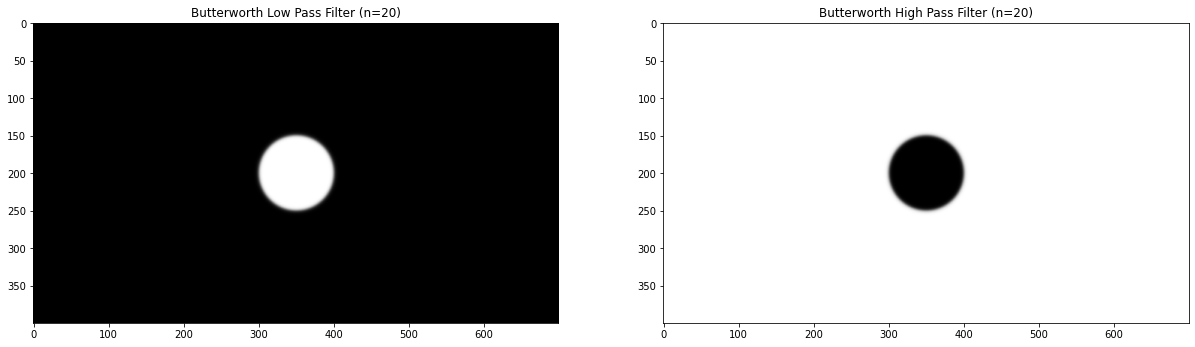

In [10]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,20)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=20)")

HighPass = butterworthHP(50,img.shape,20)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=20)")

plt.show()

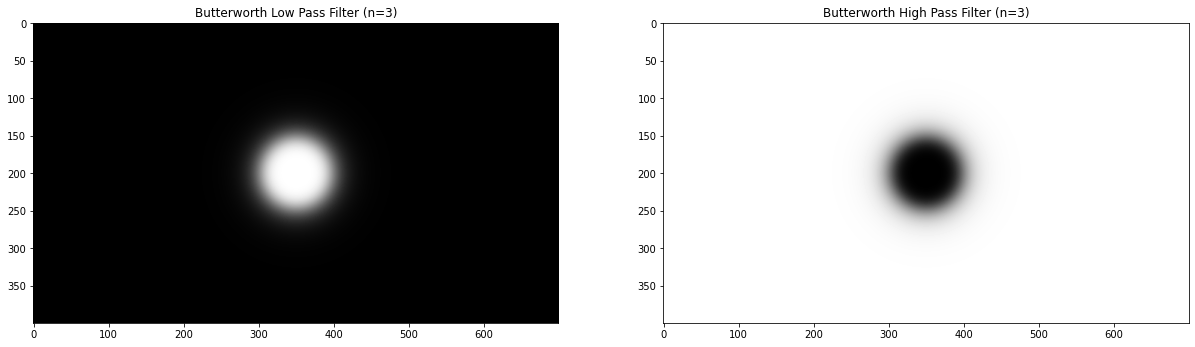

In [11]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,3)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=3)")

HighPass = butterworthHP(50,img.shape,3)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=3)")

plt.show()

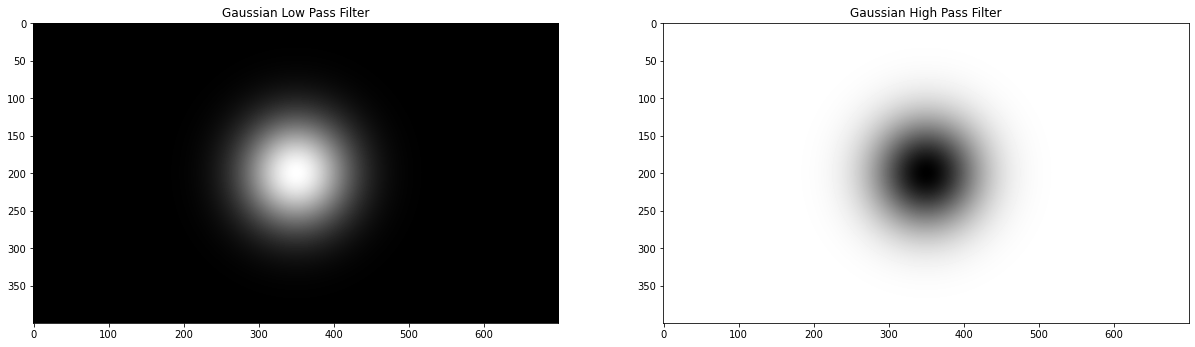

In [12]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

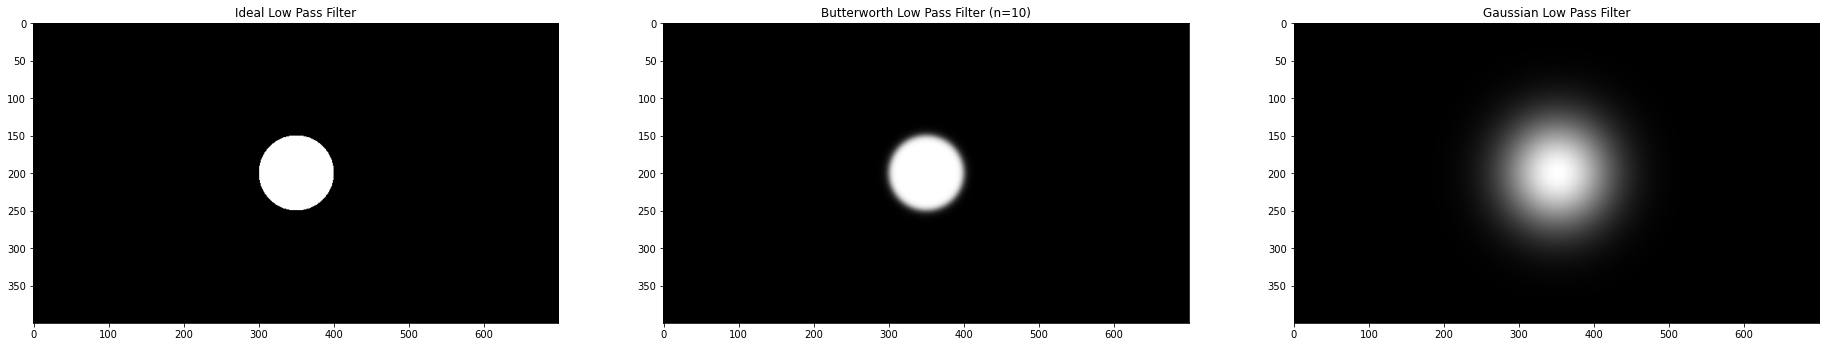

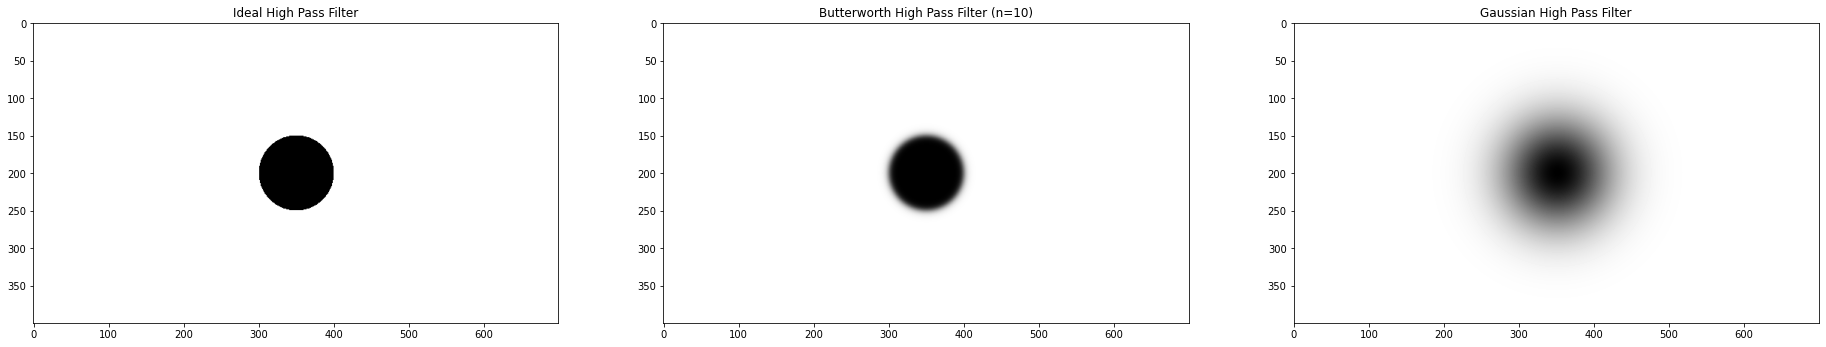

In [13]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLP = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworthLP(50,img.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussianLP(50,img.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
IdealHP = idealFilterHP(50,img.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworthHP(50,img.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussianHP(50,img.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

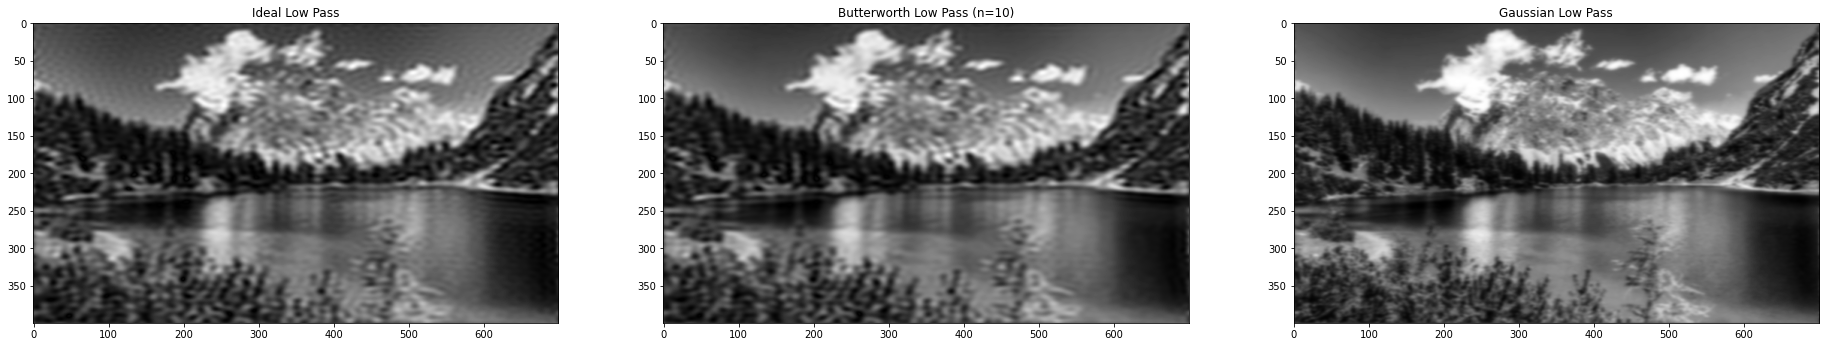

In [14]:
img = cv2.imread("sample_data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

In [ ]:
img = cv2.imread("left01.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

IndexError: cannot do a non-empty take from an empty axes.

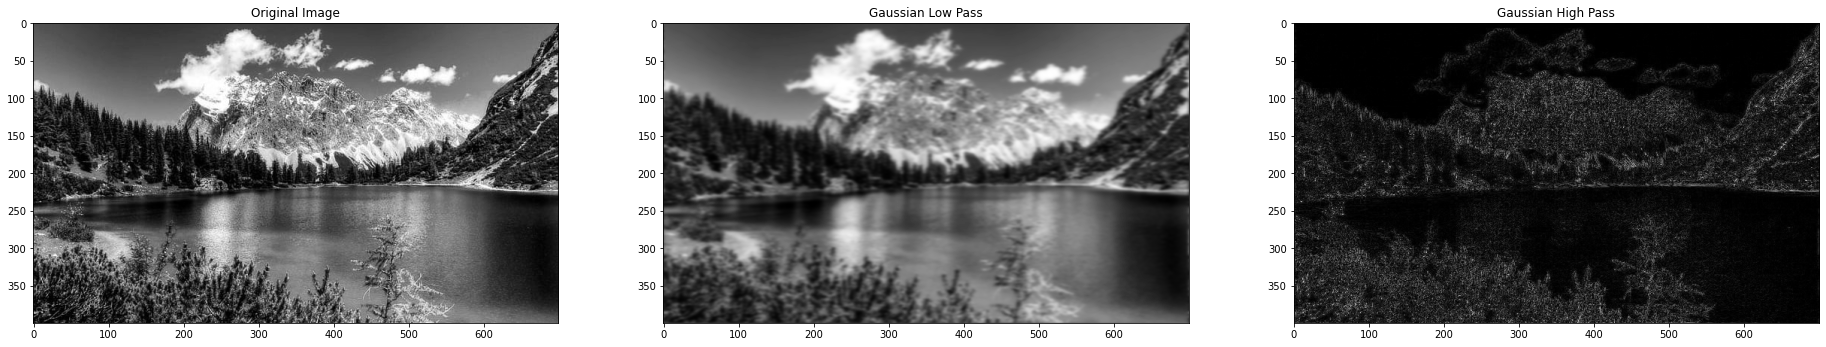

In [ ]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

## Implementar los siguientes ejercicios<a class="anchor" id="exercises"></a>:
1. Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos
2. Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

La principal aplicacion en el procesamiento digital de imagenes es mejorar la información pictórica para la percepción humana y el y proceso de conocimiento de la imagen para almacenamiento, transformación e ilustración para autónomos
percepción de la máquina. 

En el caso particular de esta tarea, estaremos trabajando con filtrado, especificamente usando transformada de Dourier, que ayuda para mejorar la imagen al remover el ruido.

Imagen original con sus espectros

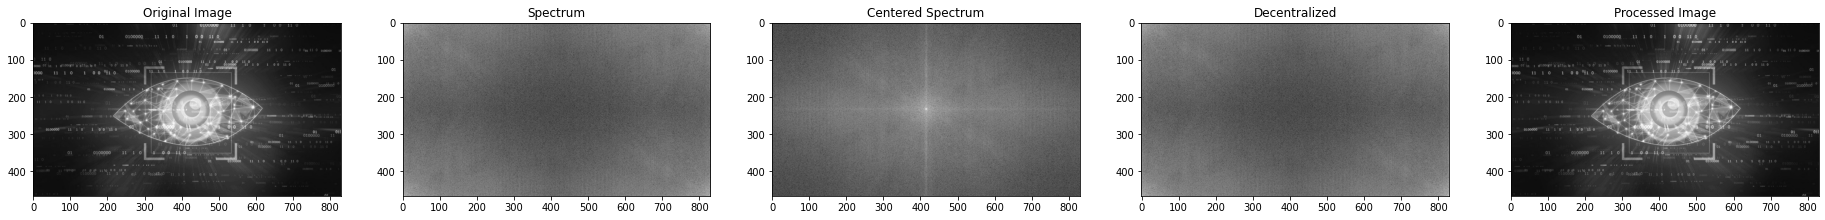

In [11]:
imgT = cv2.imread("sample_data/VisionC.jpg", 0)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(imgT, "gray"), plt.title("Original Image")

originalT = np.fft.fft2(imgT)
plt.subplot(152), plt.imshow(np.log(1+np.abs(originalT)), "gray"), plt.title("Spectrum")

centerT = np.fft.fftshift(originalT)
plt.subplot(153), plt.imshow(np.log(1+np.abs(centerT)), "gray"), plt.title("Centered Spectrum")

inv_centerT = np.fft.ifftshift(centerT)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_centerT)), "gray"), plt.title("Decentralized")

processed_imgT = np.fft.ifft2(inv_centerT)
plt.subplot(155), plt.imshow(np.abs(processed_imgT), "gray"), plt.title("Processed Image")

plt.show()

1. Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

Un filtro de paso bajas es un filtro que pasa señales de baja frecuencia
y atenúa las señales con frecuencias superiores al la frecuencia de corte. La cantidad real de atenuación para cada frecuencia varía dependiendo del diseño de filtro específico.

El filtro pasa bajas ideal es el filtro  más simple, es un filtro que "corta" todos los componentes de alta frecuencia de la Transformada de Fourier que están en una distancia mayor que una distancia especificada D desde el origen de
la transformación

Funcion de transferencia

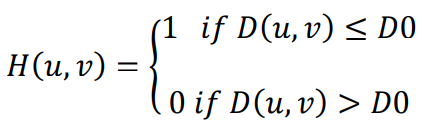

donde D(u,v) es la distancia del punto (u,v) al centro de
su frecuencia


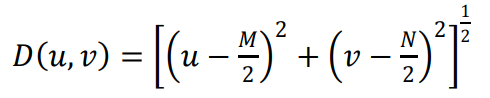

Filtros pasa bajas Butterworth: Filtro en el dominio de la frecuencia para eliminar el ruido de alta frecuencia con una pérdida mínima de
componentes de señal en la banda de paso especificada con orden n

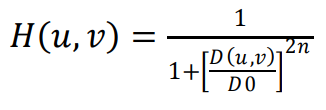

Filtros pasabajas gaussianos: la función de transferencia de un filtro de paso bajo gaussiano se define como:

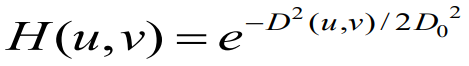

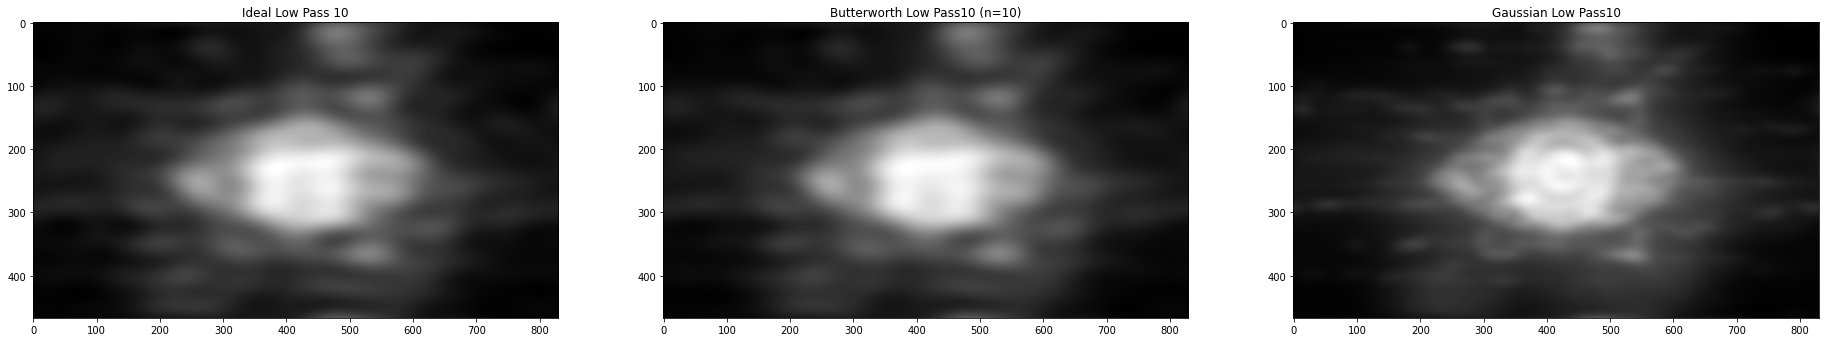

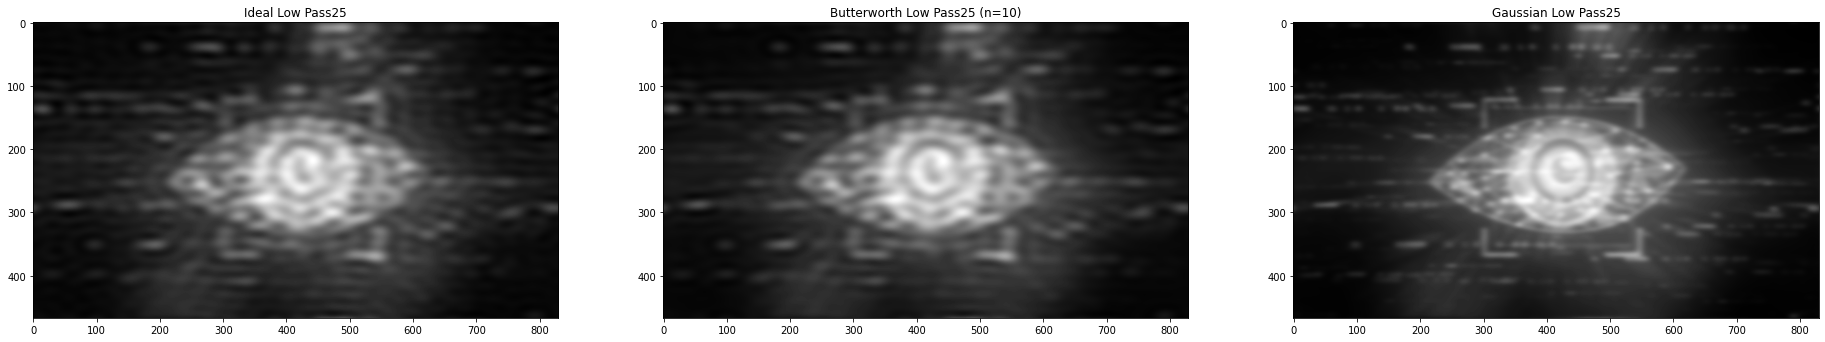

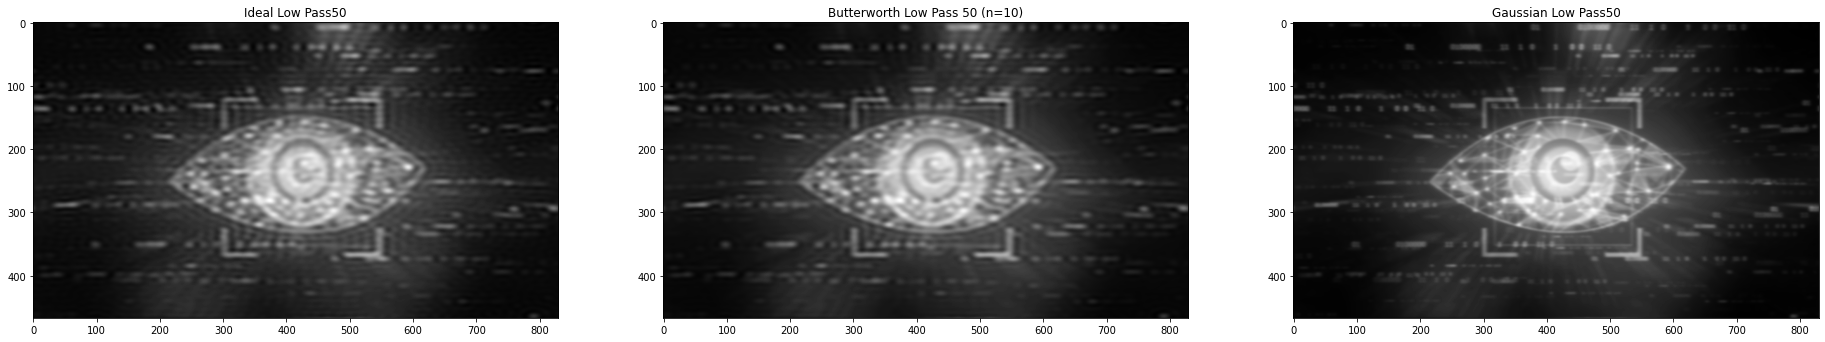

In [37]:
# Code here
originalLP = np.fft.fft2(imgT)
centerLP = np.fft.fftshift(originalLP)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenterT10 = centerLP * idealFilterLP(10,imgT.shape)
LowPassT10 = np.fft.ifftshift(LowPassCenterT10)
inverse_LowPass10 = np.fft.ifft2(LowPassT10)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass10), "gray"), plt.title("Ideal Low Pass 10")

LowPassCenterT10 = centerLP * butterworthLP(10,imgT.shape,10)
LowPassT10 = np.fft.ifftshift(LowPassCenterT10)
inverse_LowPass10 = np.fft.ifft2(LowPassT10)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass10), "gray"), plt.title("Butterworth Low Pass10 (n=10)")

LowPassCenterT10 = centerLP * gaussianLP(10,imgT.shape)
LowPassT10 = np.fft.ifftshift(LowPassCenterT10)
inverse_LowPass10 = np.fft.ifft2(LowPassT10)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass10), "gray"), plt.title("Gaussian Low Pass10")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
LowPassCenterT25 = centerLP * idealFilterLP(25,imgT.shape)
LowPassT25 = np.fft.ifftshift(LowPassCenterT25)
inverse_LowPass25 = np.fft.ifft2(LowPassT25)
plt.subplot(231), plt.imshow(np.abs(inverse_LowPass25), "gray"), plt.title("Ideal Low Pass25")

LowPassCenterT25= centerLP * butterworthLP(25,imgT.shape,10)
LowPassT25 = np.fft.ifftshift(LowPassCenterT25)
inverse_LowPass25 = np.fft.ifft2(LowPassT25)
plt.subplot(232), plt.imshow(np.abs(inverse_LowPass25), "gray"), plt.title("Butterworth Low Pass25 (n=10)")

LowPassCenterT25 = centerLP * gaussianLP(25,imgT.shape)
LowPassT25 = np.fft.ifftshift(LowPassCenterT25)
inverse_LowPass25 = np.fft.ifft2(LowPassT25)
plt.subplot(233), plt.imshow(np.abs(inverse_LowPass25), "gray"), plt.title("Gaussian Low Pass25")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
LowPassCenterT50 = centerLP * idealFilterLP(50,imgT.shape)
LowPassT50 = np.fft.ifftshift(LowPassCenterT50)
inverse_LowPass50 = np.fft.ifft2(LowPassT50)
plt.subplot(331), plt.imshow(np.abs(inverse_LowPass50), "gray"), plt.title("Ideal Low Pass50")

LowPassCenterT50 = centerLP * butterworthLP(50,imgT.shape,10)
LowPassT50 = np.fft.ifftshift(LowPassCenterT50)
inverse_LowPass50 = np.fft.ifft2(LowPassT50)
plt.subplot(332), plt.imshow(np.abs(inverse_LowPass50), "gray"), plt.title("Butterworth Low Pass 50 (n=10)")

LowPassCenterT50 = centerLP * gaussianLP(50,imgT.shape)
LowPassT50 = np.fft.ifftshift(LowPassCenterT50)
inverse_LowPass50 = np.fft.ifft2(LowPassT50)
plt.subplot(333), plt.imshow(np.abs(inverse_LowPass50), "gray"), plt.title("Gaussian Low Pass50")


plt.show()

2. Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos

Filtro Pasa Altas

Hay varias formas estándar de filtros de paso altas como: 
Filtro pasa altas Ideal, Butterworth y Gaussiano. Todo filtro pasa altas (Hhp) a menudo se representa por su relación con el filtro pasabajas (Hlp):

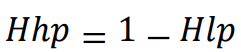

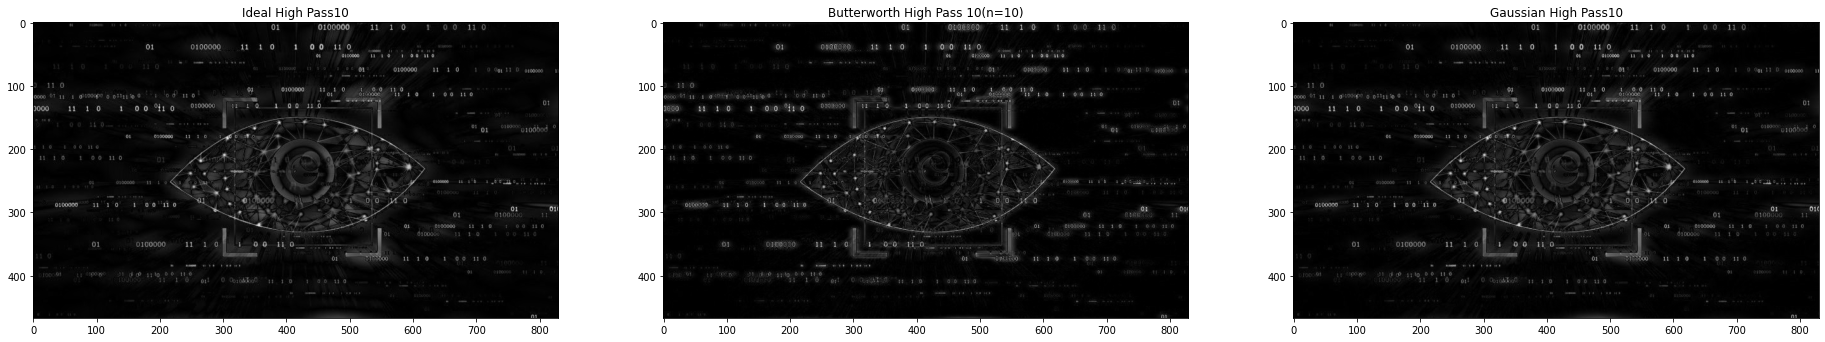

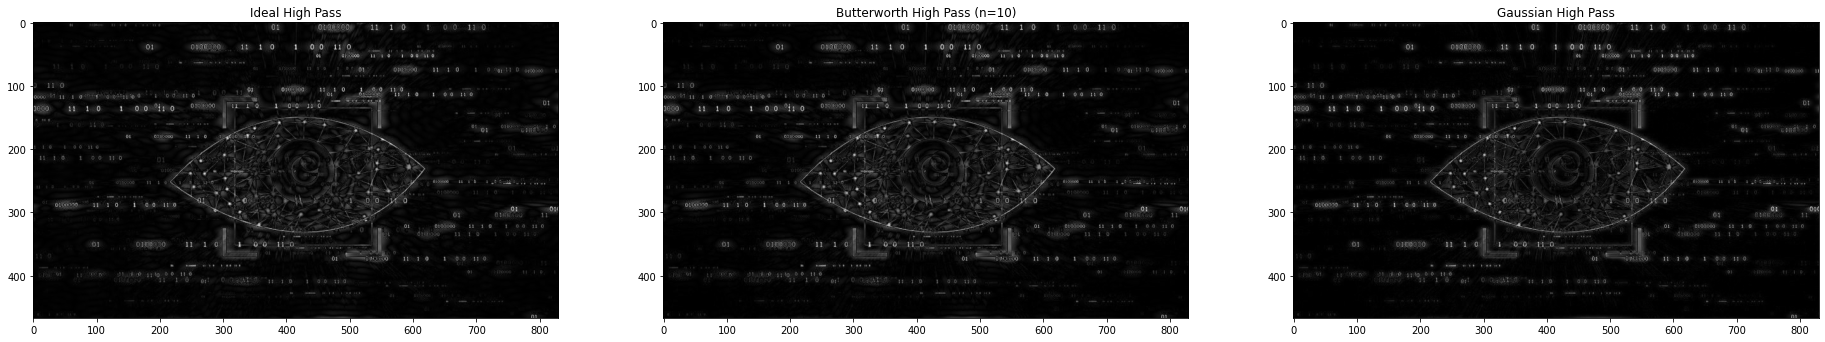

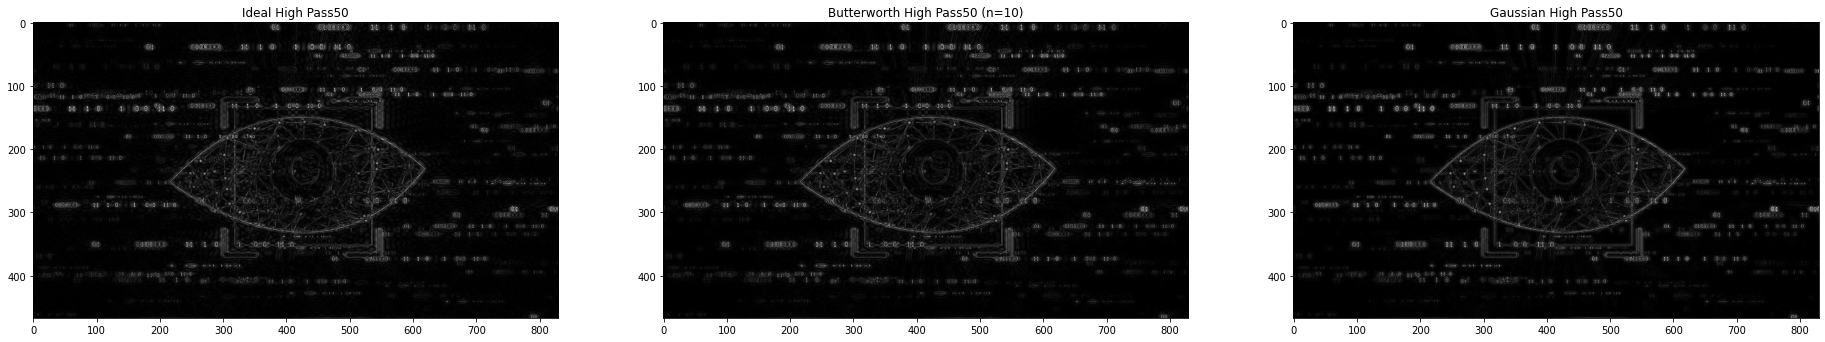

In [39]:
# Code here
# Code here
originalHP = np.fft.fft2(imgT)
centerHP = np.fft.fftshift(originalHP)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
HighPassCenterT10 = centerHP * idealFilterHP(10,imgT.shape)
HighPassT10 = np.fft.ifftshift(HighPassCenterT10)
inverse_HighPass10 = np.fft.ifft2(HighPassT10)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass10), "gray"), plt.title("Ideal High Pass10")

HighPassCenterT10 = centerHP * butterworthHP(10,imgT.shape,10)
HighPassT10 = np.fft.ifftshift(HighPassCenterT10)
inverse_HighPass10 = np.fft.ifft2(HighPassT10)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass 10(n=10)")

HighPassCenterT10 = centerHP * gaussianHP(10,imgT.shape)
HighPassT10 = np.fft.ifftshift(HighPassCenterT10)
inverse_HighPass10 = np.fft.ifft2(HighPassT10)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass10), "gray"), plt.title("Gaussian High Pass10")



plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
HighPassCenterT = centerHP * idealFilterHP(25,imgT.shape)
HighPassT = np.fft.ifftshift(HighPassCenterT)
inverse_HighPass = np.fft.ifft2(HighPassT)
plt.subplot(231), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenterT = centerHP * butterworthHP(25,imgT.shape,10)
HighPassT = np.fft.ifftshift(HighPassCenterT)
inverse_HighPass = np.fft.ifft2(HighPassT)
plt.subplot(232), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenterT = centerHP * gaussianHP(25,imgT.shape)
HighPassT = np.fft.ifftshift(HighPassCenterT)
inverse_HighPass = np.fft.ifft2(HighPassT)
plt.subplot(233), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")


plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
HighPassCenterT50 = centerHP * idealFilterHP(50,imgT.shape)
HighPassT50 = np.fft.ifftshift(HighPassCenterT50)
inverse_HighPass50 = np.fft.ifft2(HighPassT50)
plt.subplot(331), plt.imshow(np.abs(inverse_HighPass50), "gray"), plt.title("Ideal High Pass50")

HighPassCenterT50 = centerHP * butterworthHP(50,imgT.shape,10)
HighPassT50 = np.fft.ifftshift(HighPassCenterT50)
inverse_HighPass50 = np.fft.ifft2(HighPassT50)
plt.subplot(332), plt.imshow(np.abs(inverse_HighPass50), "gray"), plt.title("Butterworth High Pass50 (n=10)")

HighPassCenterT50 = centerHP * gaussianHP(50,imgT.shape)
HighPassT50 = np.fft.ifftshift(HighPassCenterT50)
inverse_HighPass50 = np.fft.ifft2(HighPassT50)
plt.subplot(333), plt.imshow(np.abs(inverse_HighPass50), "gray"), plt.title("Gaussian High Pass50")

plt.show()

#Referencias
*  Image Enhancement Techniques using Highpass and Lowpass Filters. Aziz Makandar, Bhagirathi Halalli. International Journal of Computer Applications (0975 – 8887). Volume 109 – No. 14, January 2015 https://research.ijcaonline.org/volume109/number14/pxc3900999.pdf